<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Tukey_letters_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0    10
1    12
Name: Values, dtype: int64, 2    28
3    21
Name: Values, dtype: int64, 4     9
5    14
Name: Values, dtype: int64, 6    36
7    30
Name: Values, dtype: int64]
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     13.5 0.0749  -1.8671 28.8671  False
     A      C      0.5  0.999 -14.8671 15.8671  False
     A      D     22.0 0.0147   6.6329 37.3671   True
     B      C    -13.0 0.0839 -28.3671  2.3671  False
     B      D      8.5 0.2524  -6.8671 23.8671  False
     C      D     21.5  0.016   6.1329 36.8671   True
-----------------------------------------------------


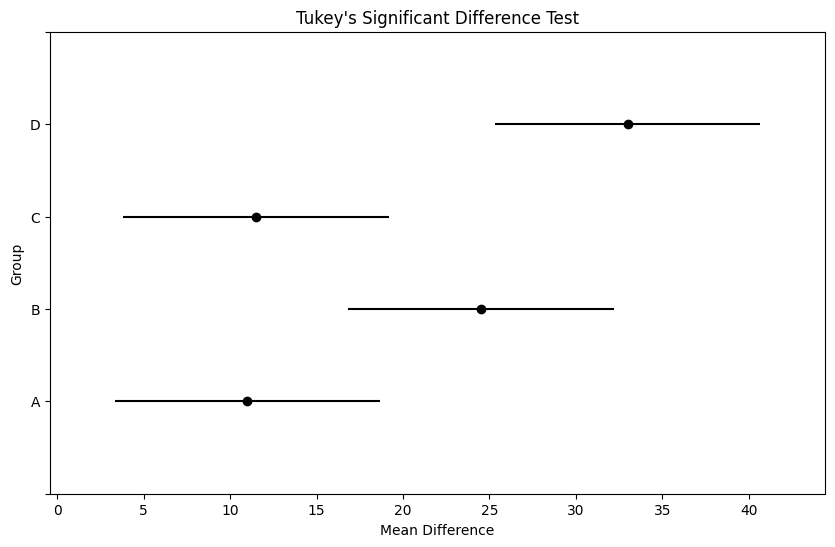

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
import matplotlib.pyplot as plt

import itertools

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [10, 12, 28, 21, 9, 14, 36, 30]
})

# Get unique variants from the DataFrame
variants = data['Group'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = list(itertools.combinations(variants, 2))

# Print the variant pairs
print("Variant Pairs:")
for pair in variant_pairs:
    print(pair)

# Perform one-way ANOVA to check for significant differences
groups = [data[data['Group'] == group]['Values'] for group in data['Group'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(groups)
if p_value < 0.05:
    # If the p-value is significant, perform Tukey's HSD test
    mc_res = mc.MultiComparison(data['Values'], data['Group'])
    result = mc_res.tukeyhsd()
    print(result.summary())

    # Create a plot with annotated statistically significant differences
    fig, ax = plt.subplots()
    result.plot_simultaneous(ax=ax, ylabel="Group", xlabel="Mean Difference")
    plt.title("Tukey's Significant Difference Test")
    plt.show()
else:
    print("Tukey's HSD test is not applicable as the overall ANOVA result is not significant.")


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.stats.multicomp as mc

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [10, 12, 28, 21, 9, 14, 36, 30]
})


# Get unique variants from the DataFrame
variants = data['Group'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = list(itertools.combinations(variants, 2))

# Print the variant pairs
print("Variant Pairs:")
for pair in variant_pairs:
    print(pair)

# Perform one-way ANOVA to check for significant differences
groups = [data[data['Group'] == group]['Values'] for group in data['Group'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

if p_value < 0.05:
    # If the p-value is significant, perform Tukey's HSD test
    mc_res = mc.MultiComparison(data['Values'], data['Group'])
    result = mc_res.tukeyhsd()

    # Extract significant variants
    significant_variants = []
    for i in range(len(data['Group'].unique())):
        for j in range(i + 1, len(data['Group'].unique())):
            if result.reject[i]:
                group_i, group_j = data['Group'].unique()[i], data['Group'].unique()[j]
                mean_diff = result.meandiffs[i]
                lower_ci, upper_ci = result.confint[i]
                p_adj = result.pvalues[i]
                significant_variants.append((group_i, group_j, mean_diff, lower_ci, upper_ci, p_adj))

    # Create a DataFrame to store the significant variants
    significant_variants_df = pd.DataFrame(significant_variants, columns=['Group A', 'Group B', 'Mean Difference',
                                                                           'Lower CI', 'Upper CI', 'Adjusted P-Value'])

    # Optionally, you can sort the DataFrame by the mean difference or the adjusted p-value
    # significant_variants_df = significant_variants_df.sort_values(by='Mean Difference', ascending=False)
    # significant_variants_df = significant_variants_df.sort_values(by='Adjusted P-Value')

    # Save the results to a CSV file for reference in the paper
    significant_variants_df.to_csv('significant_variants.csv', index=False)

    # Print the significant variants for a quick overview
    print("Significant Variants:")
    print(significant_variants_df)

else:
    print("Tukey's HSD test is not applicable as the overall ANOVA result is not significant.")


Significant Variants:
  Group A Group B  Mean Difference  Lower CI   Upper CI  Adjusted P-Value
0       C       D             22.0  6.632854  37.367146          0.014721


In [ ]:
import itertools
import pandas as pd

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': ['A', 'B', 'C', 'D'],
    'Value': [10, 12, 8, 11]
})

# Get unique variants from the DataFrame
variants = data['Variant'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = list(itertools.combinations(variants, 2))

# Print the variant pairs
print("Variant Pairs:")
for pair in variant_pairs:
    print(pair)


Variant Pairs:
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


The following python code is working at identifying the statistically significant difference between grouped pairs from the experimental data variants. It uses the t-test instead of the Tukey's test.

In [ ]:
import itertools
import pandas as pd
import statsmodels.stats.multicomp as mc

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Value': [10, 12, 28, 21, 9, 14, 36, 30]
})

# Get unique variants from the DataFrame
variants = data['Variant'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = list(itertools.combinations(variants, 2))

# Perform Tukey's test on each variant pair
significant_pairs = []

for pair in variant_pairs:
    group1 = data[data['Variant'] == pair[0]]['Value']
    group2 = data[data['Variant'] == pair[1]]['Value']
    print(group1, group2)
    _, p_value = stats.ttest_ind(group1, group2)

    if p_value < 0.05:
        significant_pairs.append((pair[0], pair[1]))

# Print the significant variant pairs
print("Significant Variant Pairs:")
for pair in significant_pairs:
    print(pair)


0    10
1    12
Name: Value, dtype: int64 2    28
3    21
Name: Value, dtype: int64
0    10
1    12
Name: Value, dtype: int64 4     9
5    14
Name: Value, dtype: int64
0    10
1    12
Name: Value, dtype: int64 6    36
7    30
Name: Value, dtype: int64
2    28
3    21
Name: Value, dtype: int64 4     9
5    14
Name: Value, dtype: int64
2    28
3    21
Name: Value, dtype: int64 6    36
7    30
Name: Value, dtype: int64
4     9
5    14
Name: Value, dtype: int64 6    36
7    30
Name: Value, dtype: int64
Significant Variant Pairs:
('A', 'D')
('C', 'D')


In [ ]:
import itertools
import pandas as pd
import statsmodels.stats.multicomp as mc

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Value': [10, 12, 28, 21, 9, 14, 36, 30]
})

# Get unique variants from the DataFrame
variants = data['Variant'].unique()

# Create all unique combinations of variants in pairs
variant_pairs = list(itertools.combinations(variants, 2))



# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()

# Extract significant variant pairs
significant_pairs = []
for i in range(len(data['Variant'].unique())):
    for j in range(i + 1, len(data['Variant'].unique())):
        if result.reject[i]:
            significant_pairs.append((data['Variant'].unique()[i], data['Variant'].unique()[j]))

# Print the significant variant pairs
print("Significant Variant Pairs:")
for pair in significant_pairs:
    print(pair)

Significant Variant Pairs:
('C', 'D')


[[2]
 [5]]
[0, 3]
[2, 3]


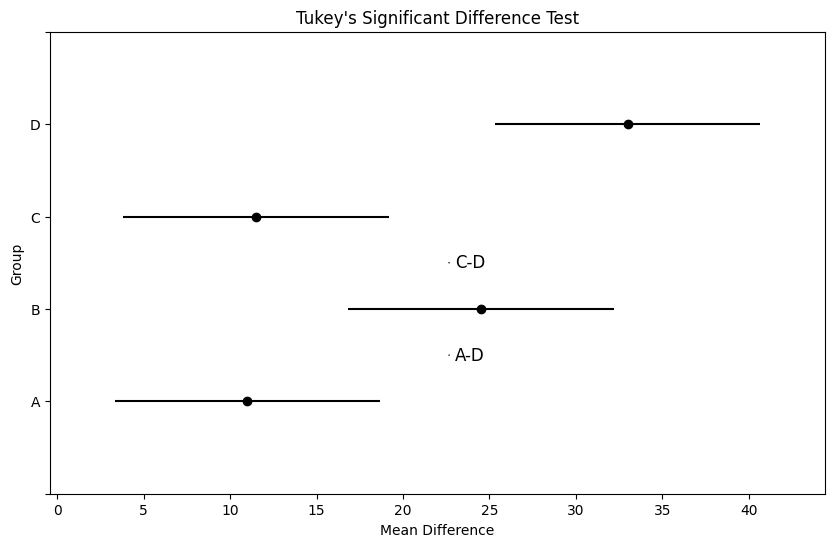

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [10, 12, 28, 21, 9, 14, 36, 30]
})

# Perform one-way ANOVA to check for significant differences
groups = [data[data['Group'] == group]['Values'] for group in data['Group'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

if p_value < 0.05:
    # If the p-value is significant, perform Tukey's HSD test
    mc_res = mc.MultiComparison(data['Values'], data['Group'])
    result = mc_res.tukeyhsd() #data['Values'], data['Group'])

    # Create a plot with annotated statistically significant differences
    fig, ax = plt.subplots()
    result.plot_simultaneous(ax=ax, ylabel="Group", xlabel="Mean Difference")

    # Annotate the graph with letters for significant differences
    y_ticks = ax.get_yticks()
    sig_diff_pairs = [np.column_stack(np.where(result.reject))]
    print(sig_diff_pairs[0])
    p = [[0,3],[2,3]]
    #'''
    for pair in p:#sig_diff_pairs:
        print(pair)
        i, j = pair
        mean_diff = result.meandiffs[pair]
        x_pos = max(result.meandiffs) + 0.5
        y_pos = (y_ticks[i] + y_ticks[j]) / 2
        ax.annotate(
            f'{result.groupsunique[i]}-{result.groupsunique[j]}',
            xy=(x_pos, y_pos),
            xytext=(x_pos + 0.5, y_pos),
            arrowprops=dict(facecolor='black', arrowstyle='-'),
            fontsize=12,
            ha='left',
            va='center'
        )

    plt.title("Tukey's Significant Difference Test")
    plt.show()
else:
    print("Tukey's HSD test is not applicable as the overall ANOVA result is not significant.")
#'''

{'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D'}


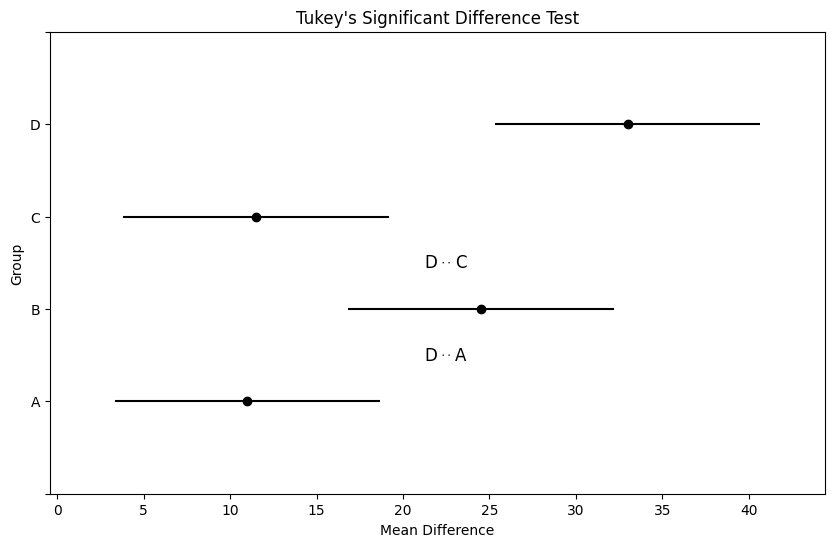

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [10, 12, 28, 21, 9, 14, 36, 30]
})

# Perform one-way ANOVA to check for significant differences
groups = [data[data['Group'] == group]['Values'] for group in data['Group'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

if p_value < 0.05:
    # If the p-value is significant, perform Tukey's HSD test
    mc_res = mc.MultiComparison(data['Values'], data['Group'])
    result = mc_res.tukeyhsd()

    # Create a plot with annotated statistically significant differences
    fig, ax = plt.subplots()
    result.plot_simultaneous(ax=ax, ylabel="Group", xlabel="Mean Difference")

    # Annotate the graph with letters for significant differences
    y_ticks = ax.get_yticks()
    sig_diff_pairs = np.column_stack(np.where(result.reject))
    letters = [chr(65 + i) for i in range(len(data['Group'].unique()))]
    group_letters = dict(zip(data['Group'].unique(), letters))
    p = [[0,3],[2,3]]
    print(group_letters)
    for pair in p:#sig_diff_pairs:
        i, j = pair
        mean_diff = result.meandiffs[pair]
        x_pos = max(result.meandiffs) + 0.5
        y_pos = (y_ticks[i] + y_ticks[j]) / 2

        # Label groups with corresponding letters
        ax.annotate(
            f'{group_letters[result.groupsunique[i]]}',
            xy=(x_pos, y_pos),
            xytext=(x_pos + 0.5, y_pos),
            arrowprops=dict(facecolor='black', arrowstyle='-'),
            fontsize=12,
            ha='left',
            va='center'
        )
        ax.annotate(
            f'{group_letters[result.groupsunique[j]]}',
            xy=(x_pos, y_pos),
            xytext=(x_pos - 0.5, y_pos),
            arrowprops=dict(facecolor='black', arrowstyle='-'),
            fontsize=12,
            ha='right',
            va='center'
        )

    plt.title("Tukey's Significant Difference Test")
    plt.show()
else:
    print("Tukey's HSD test is not applicable as the overall ANOVA result is not significant.")


['a-b', 'a-c', 'a-d', 'b-c', 'b-d', 'c-d'] ['A', 'B', 'C', 'D', 'E', 'F'] {'a-b': 'A', 'a-c': 'B', 'a-d': 'C', 'b-c': 'D', 'b-d': 'E', 'c-d': 'F'}


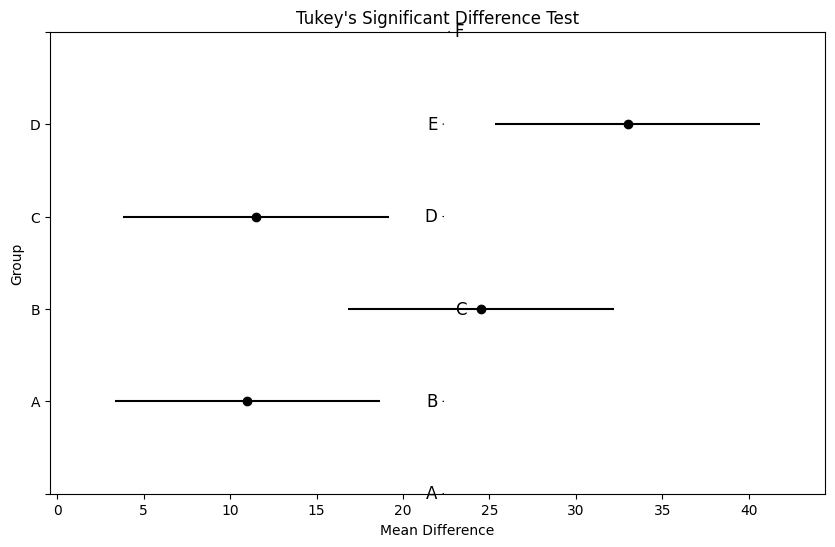

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.stats.multicomp as mc
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Group': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Values': [10, 12, 28, 21, 9, 14, 36, 30]
})
# Perform one-way ANOVA to check for significant differences
groups = [data[data['Group'] == group]['Values'] for group in data['Group'].unique()]
f_stat, p_value = stats.f_oneway(*groups)

if p_value < 0.05:
    # If the p-value is significant, perform Tukey's HSD test
    mc_res = mc.MultiComparison(data['Values'], data['Group'])
    result = mc_res.tukeyhsd()

    # Create a plot with annotated statistically significant differences
    fig, ax = plt.subplots()
    result.plot_simultaneous(ax=ax, ylabel="Group", xlabel="Mean Difference")

    # Annotate the graph with letters for significant and non-significant groups
    y_ticks = ax.get_yticks()
    #all_groups = data['Group'].unique()

    all_groups = ['a-b', 'a-c', 'a-d', 'b-c', 'b-d', 'c-d']
    letters = [chr(65 + i) for i in range(len(all_groups))]
    group_letters = dict(zip(all_groups, letters))

    print(all_groups, letters, group_letters)
    pairs = np.column_stack(np.where(result.reject))

    for i, group in enumerate(all_groups):
        x_pos = max(result.meandiffs) + 0.5
        y_pos = y_ticks[i]

        # Check if the group is rejected
        if result.reject[i]:
            ax.annotate(
                f'{group_letters[group]}',
                xy=(x_pos, y_pos),
                xytext=(x_pos + 0.5, y_pos),
                arrowprops=dict(facecolor='black', arrowstyle='-'),
                fontsize=12,
                ha='left',
                va='center'
            )
        else:
            ax.annotate(
                f'{group_letters[group]}',
                xy=(x_pos, y_pos),
                xytext=(x_pos - 0.5, y_pos),
                arrowprops=dict(facecolor='black', arrowstyle='-'),
                fontsize=12,
                ha='right',
                va='center'
            )

    plt.title("Tukey's Significant Difference Test")
    plt.show()
else:
    print("Tukey's HSD test is not applicable as the overall ANOVA result is not significant.")


In [ ]:
! pip install statsmodels matplotlib

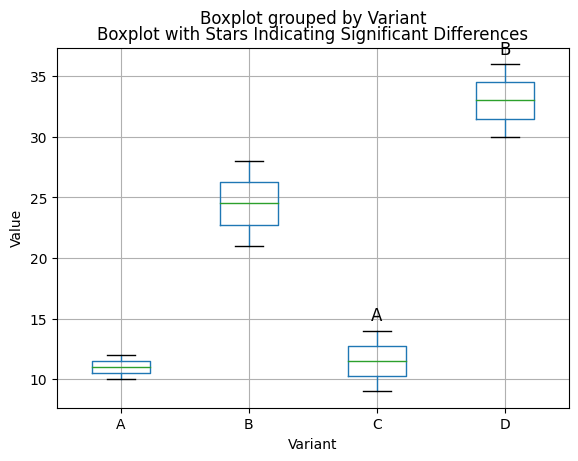

In [ ]:
import pandas as pd
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
from string import ascii_uppercase

import numpy as np
import scipy.stats as stats
import itertools

# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'],
    'Value': [10, 12, 28, 21, 9, 14, 36, 30]
})


# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()

# Extract significant variant pairs and their corresponding letters
significant_pairs = {}
letters = iter(ascii_uppercase)

for i in range(len(data['Variant'].unique())):
    for j in range(i + 1, len(data['Variant'].unique())):
        if result.reject[i]:
            variant_i, variant_j = data['Variant'].unique()[i], data['Variant'].unique()[j]
            letter_i = significant_pairs.get(variant_i, next(letters))
            letter_j = significant_pairs.get(variant_j, next(letters))
            significant_pairs[variant_i] = letter_i
            significant_pairs[variant_j] = letter_j

# Create a plot with stars indicating significant differences
fig, ax = plt.subplots()
data.boxplot(column='Value', by='Variant', ax=ax)

# Add stars to indicate significant differences
for i, group in enumerate(data['Variant'].unique()):
    letter = significant_pairs.get(group, '')
    y_pos = data[data['Variant'] == group]['Value'].max() + 0.5
    ax.text(i + 1, y_pos, f"{letter}", ha='center', va='bottom', fontsize=12)

plt.title("Boxplot with Stars Indicating Significant Differences")
plt.xlabel("Variant")
plt.ylabel("Value")
plt.show()
